<a href="https://colab.research.google.com/github/keirabasma/Formation-IA/blob/main/FAID_NACERA_Workshop_Solution_AI_partie2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib seaborn plotly

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [3]:
from google.colab import files

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)
print(df.head())

Saving gapminder.csv to gapminder.csv
   Unnamed: 0      country  year  population continent  life_exp       gdp_cap
0          11  Afghanistan  2007    31889923      Asia    43.828    974.580338
1          23      Albania  2007     3600523    Europe    76.423   5937.029526
2          35      Algeria  2007    33333216    Africa    72.301   6223.367465
3          47       Angola  2007    12420476    Africa    42.731   4797.231267
4          59    Argentina  2007    40301927  Americas    75.320  12779.379640


In [4]:
# -----------------------------
# Step 1: Load Dataset
# -----------------------------
print("=== Step 1: Dataset Loaded ===")
print("Data Types:", df.dtypes)
print("Shape:", df.shape)

=== Step 1: Dataset Loaded ===
Data Types: Unnamed: 0      int64
country        object
year            int64
population      int64
continent      object
life_exp      float64
gdp_cap       float64
dtype: object
Shape: (142, 7)


In [5]:
# -----------------------------
# Step 2: Data Handling & Matplotlib/Seaborn Visualizations
# -----------------------------
print("=== Step 2: Data Handling & Matplotlib/Seaborn Visualizations ===")
# Clean missing values and ensure correct types
df.dropna(inplace=True)
df['continent'] = df['continent'].astype('category')
df['population'] = pd.to_numeric(df['population'], errors='coerce')
df['life_exp'] = pd.to_numeric(df['life_exp'], errors='coerce')
df['gdp_cap'] = pd.to_numeric(df['gdp_cap'], errors='coerce')

=== Step 2: Data Handling & Matplotlib/Seaborn Visualizations ===


In [6]:
# Aggregate mean values by continent
continent_means = df.groupby('continent', observed=False).mean(numeric_only=True)
print("\n=== Mean Values by Continent ===")
print(continent_means)



=== Mean Values by Continent ===
           Unnamed: 0    year    population   life_exp       gdp_cap
continent                                                           
Africa     845.000000  2007.0  1.787576e+07  54.806038   3089.032605
Americas   779.480000  2007.0  3.595485e+07  73.608120  11003.031625
Asia       952.818182  2007.0  1.155138e+08  70.728485  12473.026870
Europe     855.000000  2007.0  1.953662e+07  77.648600  25054.481636
Oceania    587.000000  2007.0  1.227497e+07  80.719500  29810.188275


In [7]:
# Compute correlation matrix for numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()
print("\n=== Correlation Matrix ===")
print(corr)


=== Correlation Matrix ===
            Unnamed: 0  year  population  life_exp   gdp_cap
Unnamed: 0    1.000000   NaN   -0.067378  0.039671  0.026739
year               NaN   NaN         NaN       NaN       NaN
population   -0.067378   NaN    1.000000  0.047553 -0.055676
life_exp      0.039671   NaN    0.047553  1.000000  0.678662
gdp_cap       0.026739   NaN   -0.055676  0.678662  1.000000


In [8]:
# -----------------------------
# Matplotlib & Seaborn Figures
# -----------------------------
plt.figure(figsize=(15, 12))

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

Text(0, 0.5, 'Frequency')

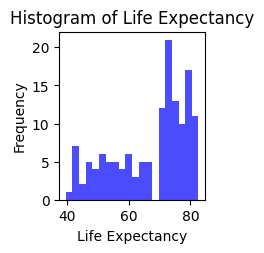

In [9]:
# 1. Histogram of Life Expectancy
plt.subplot(2, 3, 1)
plt.hist(df['life_exp'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Box Plot of GDP per Capita')

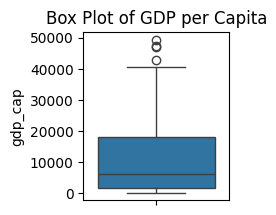

In [10]:
# 2. Boxplot of GDP per Capita
plt.subplot(2, 3, 2)
sns.boxplot(y=df['gdp_cap'])
plt.title('Box Plot of GDP per Capita')

Text(0.5, 1.0, 'Scatter Plot: GDP vs Life Expectancy')

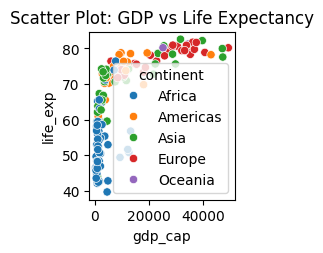

In [11]:
# 3. Scatter Plot: GDP vs Life Expectancy
plt.subplot(2, 3, 3)
sns.scatterplot(data=df, x='gdp_cap', y='life_exp', hue='continent')
plt.title('Scatter Plot: GDP vs Life Expectancy')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Africa'),
  Text(1, 0, 'Americas'),
  Text(2, 0, 'Asia'),
  Text(3, 0, 'Europe'),
  Text(4, 0, 'Oceania')])

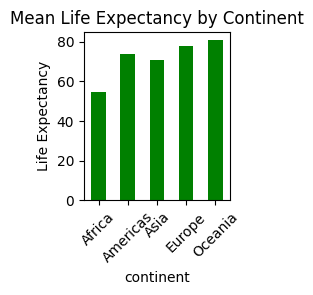

In [12]:
# 4. Bar Chart: Mean Life Expectancy by Continent
plt.subplot(2, 3, 4)
continent_means['life_exp'].plot(kind='bar', color='green')
plt.title('Mean Life Expectancy by Continent')
plt.ylabel('Life Expectancy')
plt.xticks(rotation=45)

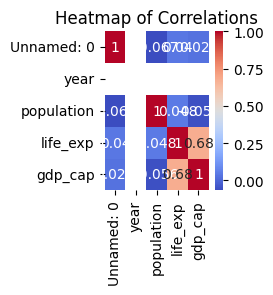

In [13]:
# 5. Heatmap of Correlations
plt.subplot(2, 3, 5)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations')

plt.tight_layout()
plt.show()

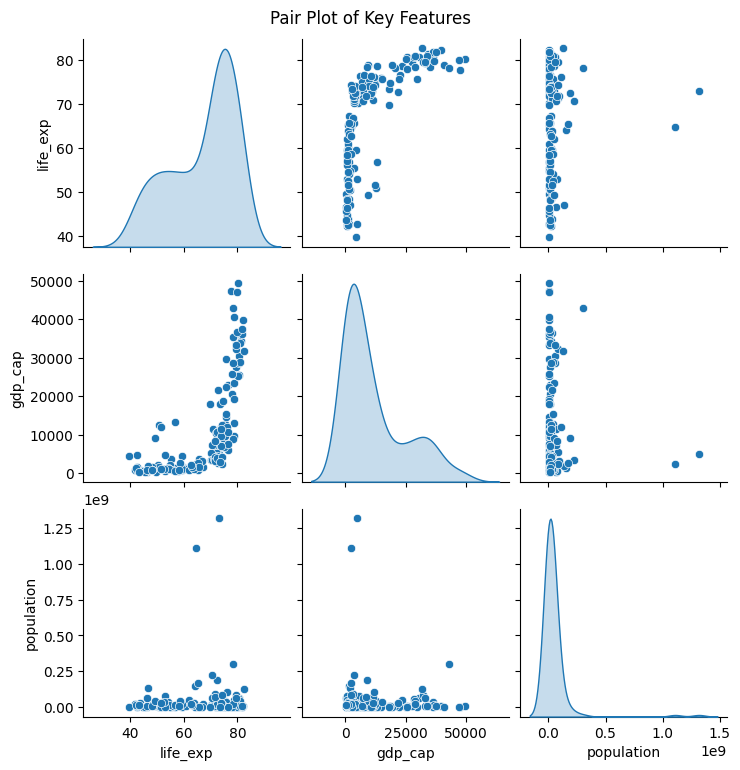

In [14]:
# 6. Pair Plot (separate figure)
sns.pairplot(df[['life_exp', 'gdp_cap', 'population']].dropna(), diag_kind='kde')
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()

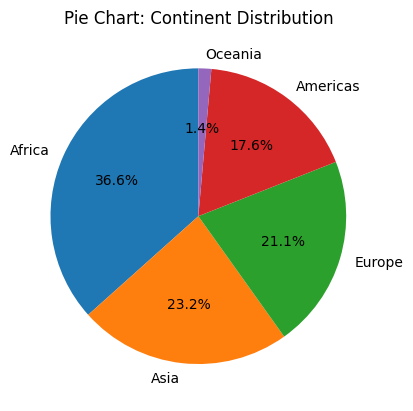

In [15]:
# Additional: Pie Chart for Continent Distribution
plt.figure()
df['continent'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart: Continent Distribution')
plt.ylabel('')
plt.show()

In [16]:
print("=== Key Insights from Step 2 ===")
print("- Histograms and boxplots show distributions and outliers in numeric data.")
print("- Scatter plots reveal relationships (e.g., positive correlations for GDP-like vs life expectancy-like variables).")
print("- Heatmaps are useful for feature selection in ML.")


=== Key Insights from Step 2 ===
- Histograms and boxplots show distributions and outliers in numeric data.
- Scatter plots reveal relationships (e.g., positive correlations for GDP-like vs life expectancy-like variables).
- Heatmaps are useful for feature selection in ML.


In [17]:
# -----------------------------
# Step 3: Interactive Visualizations with Plotly
# -----------------------------
print("=== Step 3: Interactive Visualizations with Plotly ===")

=== Step 3: Interactive Visualizations with Plotly ===


In [18]:
# Scatter Plot (interactive)
fig1 = px.scatter(df, x='gdp_cap', y='life_exp', color='continent',
                  size='population', hover_name='country',
                  title='Interactive Scatter Plot: GDP vs Life Expectancy')
fig1.show()

In [19]:
# Box Plot
fig2 = px.box(df, y='gdp_cap', color='continent', title='Interactive Box Plot: GDP per Capita by Continent')
fig2.show()

In [20]:
# Interactive Heatmap
fig3 = px.imshow(corr, text_auto=True, color_continuous_scale='Viridis',
                 title='Interactive Heatmap of Correlations')
fig3.show()

In [21]:
# Pie Chart
fig4 = px.pie(df, names='continent', title='Interactive Pie Chart: Continent Distribution')
fig4.show()

In [22]:
# -----------------------------
# Insights Summary
# -----------------------------
print("=== Key Insights from Step 3 ===")
print("- Plotly interactivity allows zooming, hovering, and filtering for deeper exploration.")
print("- Outliers and distributions vary by category (e.g., higher values in certain groups).")

=== Key Insights from Step 3 ===
- Plotly interactivity allows zooming, hovering, and filtering for deeper exploration.
- Outliers and distributions vary by category (e.g., higher values in certain groups).
